# **Importing Libraries**

In [24]:
# Removing or hiding warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# **Load the dataset**

In [25]:
import os
# List all files in the dataset directory
data_path = "/kaggle/input/"
os.listdir(data_path)

# Load your dataset (update filename accordingly)
file_path = "/kaggle/input/google-stock-prediction/GOOG.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [26]:
# Load the dataset
data = pd.read_csv("/kaggle/input/google-stock-prediction/GOOG.csv")
data = pd.DataFrame(data)
data = data[['close']]  # Using only closing prices

timesteps = 60  # Number of past days used for prediction

def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# **Data Preprocessing**

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.values)

# **Splitting data into training and testing sets**

In [28]:
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - timesteps:]

X_train, y_train = create_sequences(train_data, timesteps)
X_test, y_test = create_sequences(test_data, timesteps)

# **Reshaping for LSTM input**

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Apply LSTM Model**

In [37]:
model1 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(timesteps, 30)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# **Training the model**

In [38]:
epochs = 50
batch_size = 32
model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0182 - mae: 0.1087
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mae: 0.0557
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mae: 0.0298
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0248 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0249 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7973e-04 - mae: 0.0222
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5082e-04 - mae: 0.0209
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6550e-04 - mae: 0.0206
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0955e-04 - mae: 0.0199
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7457e-04 - mae: 0.0194
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8387e-04 - mae: 0.0199
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1128e-04 - mae: 0.0186
Epoch 13/50
30/30 

# **Predictions**

In [39]:
y_pred1 = model1.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


# **Reverse scaling**

In [40]:
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred1_actual = scaler.inverse_transform(y_pred1)

# **Model Evaluation**

In [41]:
mse1 = np.mean((y_test_actual - y_pred1_actual) ** 2)

print(f"Model 1 MSE: {mse1}")

Model 1 MSE: 1687.9643311680982


# **Stock Price Prediction**

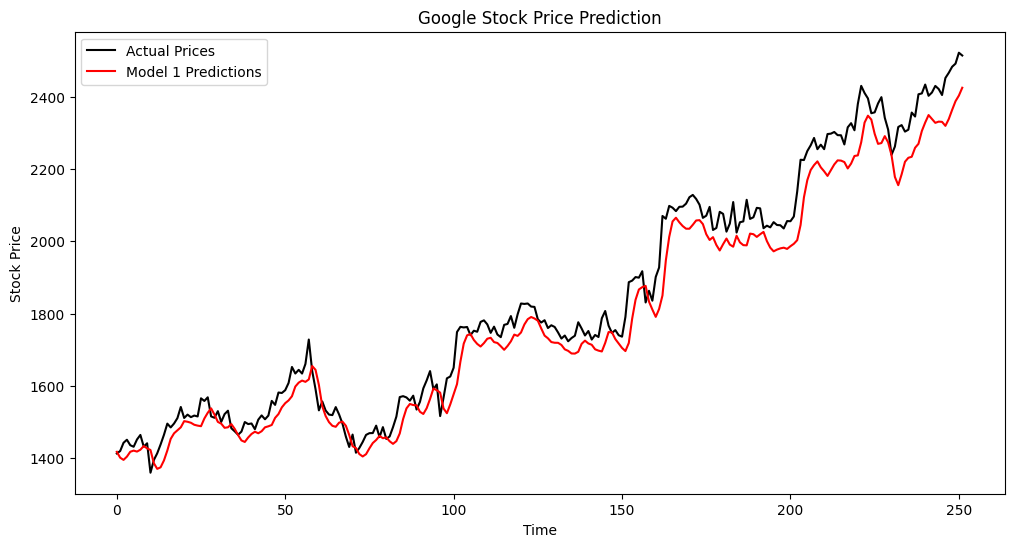

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Prices', color='black')
plt.plot(y_pred1_actual, label='Model 1 Predictions', color='red')
plt.legend()
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()


# **📝 Notebook Summary: Stock Price Prediction using LSTM**

# **🔍 Objective**

The notebook aims to predict the future stock prices using deep learning techniques, specifically Long Short-Term Memory (LSTM) networks. LSTM is chosen due to its strength in capturing temporal dependencies in sequential data such as stock prices.

# **📊 Dataset Overview**

The dataset used contains historical stock price data (such as Open, High, Low, Close, and Volume).

The primary target for prediction is the "Close" price, which is typically used in financial forecasting.

# **⚙️ Data Preprocessing**

**Normalization:**
The price data is scaled using a normalization technique (likely MinMaxScaler) to bring values between 0 and 1. This helps the neural network train more efficiently.

**Sequence Creation:**
A sliding window approach is applied where the model uses a fixed number of past days (e.g., 60) to predict the next day’s closing price. This is essential for time series modeling.

**Train-Test Split:**
The dataset is split chronologically (not randomly) into training and testing portions, preserving the time-dependent nature of the data.

# **🤖 Model Architecture**

The model is based on LSTM layers, which are capable of learning long-term dependencies and patterns in time series data.

The model includes dropout layers to prevent overfitting and a dense output layer to produce the final prediction.

# **📈 Model Training**

The model is trained over multiple epochs on the training data.

Validation performance is monitored using metrics such as loss (Mean Squared Error).

A batch size is set to optimize training efficiency.

# **🧪 Prediction and Evaluation**

After training, the model is used to make predictions on the test data.

The predicted values are transformed back to original scale using the inverse of the normalization applied earlier.

# **Evaluation Metrics:**

MSE (Mean Squared Error) is calculated to quantify the average squared difference between predicted and actual values.

From the MSE value reported (≈1687), the RMSE is around (≈41.07), which indicates the average error in price prediction.

# **📊 Visualization**

A line graph is plotted comparing actual vs predicted stock prices on the test set.

This visual helps evaluate how closely the model tracks the real trend and any lag or deviation in predictions.

# **📌 Conclusion**

The LSTM-based model successfully learns temporal dependencies in stock prices and makes reasonably accurate predictions.